In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
companies_ticker = {
    "Apple": "AAPL",
    "Microsoft": "MSFT",
    "Google": "GOOGL",
    "Amazon": "AMZN",
    "Tesla": "TSLA",
    "Meta": "META",
    "Nvidia": "NVDA",
    "Walmart": "WMT",
    "Netflix": "NFLX",
    "Flipkart": "FLIP"  
   }
names = ["Google","Amazon","Meta","Microsoft","Apple","Nvidia","Tesla","Netflix","Flipkart","Walmart"]

In [3]:
def metrics(df):
    df['Daily Returns'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1))*100.0
    print(f"1. You want to see the daily returns of recent business days.")
    print(f"2. You want a line plot of daily returns of full data or over a specific period.")
    print(f"3. You want the volatility of the stocks over a specific period.")

    opt = int(input("Enter 1 or 2 or 3 :"))

    if opt == 1:
        num = int(input(f"Enter for how many recent business (out of {len(df)}) you want daily returns of : "))
        print(df[-num:]['Daily Returns'])
        
    elif opt == 2:
        option = input("Enter Full data or Specific period:")
        if option == 'Full data':
            df['Daily Returns'].plot(figsize=(10, 5), title='Daily Returns')
            plt.show()
        elif option == 'Specific Period': 
            st = input(f"\nEnter starting date of your period which should be in the range [ {df.index[0]} to {df.index[-1]} ] :")
            end = input(f"Enter ending date of your period in the same range :")
            df[st:end]['Daily Returns'].plot(figsize=(10, 5), title='Daily Returns')
            plt.show()
        else: print("Invalid option entered. Enter correct option with correct spelling.")    

    elif opt == 3:
        st = input(f"\nEnter starting date of your period which should be in the range [ {df.index[0]} to {df.index[-1]} ] :")
        end = input(f"Enter ending date of your period in the same range :")
        daily_volatility = np.std(df[st:end]['Daily Returns'], ddof=1)
        print(f"\nDaily Volatility from {st} to {end}: {daily_volatility:.6f}")

    else: print("Invalid option entered.")


In [4]:
def visualise(df):
     data = df[-63:][["Open" , "High" , "Low" , "Close" ]]
     data.plot(figsize=(12,5),title="Stock Prices of last 3 months",ylabel="Prices (USD)")
     plt.show()
     cols = df.columns 
     print(f"1. You want to plot any of the specify category in {cols} over a specific period.")
     print(f"2. You want to compare 2 or more categories over a specific period using line charts.")
     print(f"3. You want to plot rolling mean and standard deviation with your choice of rolling window size.")
     opt = int(input("Enter 1 or 2 or 3:"))
     if opt == 1:
         plt.close()
         col = input(f"Enter any column from {cols} :")
         st = input(f"\nEnter starting date of your period which should be in the range [ {df.index[0]} to {df.index[-1]} ] :")
         end = input(f"Enter ending date of your period in the same range :")
         df[st:end][col].plot(figsize=(10, 5), title=f"Stock Prices Over the period {st} <-> {end}" , ylabel=f"{col}")
         plt.show()

     elif opt == 2:
         plt.close()
         cols = ["Open" , "High" , "Low" , "Close" ]
         print(f"The categories are {cols}")
         num = int(input("Enter how many categories you want in the plot (2 , 3 or all 4)"))
         col = []
         for i in range(num):
             cat = input(f"\nEnter the category number {i+1} : ")
             col.append(cat)
         st = input(f"\nEnter starting date of your period which should be in the range [ {df.index[0]} to {df.index[-1]} ] :")
         end = input(f"Enter ending date of your period in the same range :")   
         df[st:end][col].plot(figsize=(10, 5), title=f"Stock Prices Over the period {st} <-> {end}")
         plt.show()   
         
     elif opt == 3:
         plt.close()
         col = input(f"\nEnter any column from {cols} :")
         st = input(f"Enter starting date of your period which should be in the range [ {df.index[0]} to {df.index[-1]} ] :")
         end = input("Enter ending date of your period in the same range :")
         window = int(input("\nEnter the window size in terms of days :"))
         ts = df[st:end][col]
         plt.plot(ts, label='Actual Data')
         plt.plot(ts.rolling(window).mean(), label='Rolling Mean')
         plt.plot(ts.rolling(window).std(), label='Rolling Std')
         plt.legend()
         plt.show()

     else: print("Invalid option entered.")

In [5]:
def analysis(name , period="1y"):
      
      ticker_symbol = companies_ticker[name] 
      stock = yf.Ticker(ticker_symbol)
      df = stock.history(period=period, interval="1d")
      df.reset_index( inplace=True)
      df['Date'] = df['Date'].dt.date
      df['Date'] = pd.to_datetime(df['Date'])
      df.set_index("Date" , inplace=True)
      print(f"\nStock data is fetched for {name} for business days on a daily basis from {df.index[0]} TO {df.index[-1]}")
     
      df.drop(columns = ['Dividends','Stock Splits'] , inplace=True )
      print("\nHere is an overview of the stocks -- ")
      print(df)
      print("\nYou have the following analysis options :")
      print("""1. Brief description of the stocks (mean, std etc.)in a specific range of dates.\n2. Visualise movements using charts.
3. Work with financial metrics like daily returns and volatility""")
      idx = int(input("Enter the option (1 or 2 or 3):"))
      if idx == 1:
          st = input(f"\nEnter starting date of your period which should be in the range [ {df.index[0]} to {df.index[-1]} ] :")
          end = input(f"Enter ending date of your period in the same range :")
          print(df[st:end].describe())
      elif idx == 2:   visualise(df)
      elif idx == 3:   metrics(df)    
      else: print("Invalid option entered.")    
       

In [17]:
def compare():
    num_companies = input("Enter a no. b/w 2 and 10 (number of comp. b/w which you want comparison): ")
    while not num_companies.isdigit() or not (2 <= int(num_companies) <= 10):
        print("Invalid input. Please enter a number within the range 2 to 10.")
        num_companies = input("Enter a number between 2 and 10: ")
    num_companies = int(num_companies)
    print("Available companies:", names)
    
    selected_companies = []
    for i in range(num_companies):
        company = input(f"Enter the name of company {i + 1} (from the list above): ")
        while company not in names:
            print("Invalid company name. Please choose from the list.")
            company = input(f"Enter the name of company {i + 1} (from the list above): ")
        selected_companies.append(company)

    columns = ["Open", "High", "Low", "Close"]
    chosen_column = input(f"Choose a column to analyze {columns}: ")
    while chosen_column not in columns:
        print(f"Invalid choice. Please choose from {columns}.")
        chosen_column = input(f"Choose a column to analyze {columns}: ")

    tickers = [companies_ticker[company] for company in selected_companies]
    data = yf.download(tickers, period="2y", interval="1d")
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].dt.date
    data['Date'] = pd.to_datetime(data['Date'])
    start_date = data['Date'].iloc[0]
    end_date = data['Date'].iloc[-1]
    print(f"Stock data is fetched for business days on a daily basis from {start_date} to {end_date}.")

    st = input(f"\nEnter starting date of your period which should be in the range [ {start_date} to {end_date} ] :")
    end = input(f"Enter ending date of your period in the same range :")
    while pd.to_datetime(st, format='%Y-%m-%d') >= pd.to_datetime(end, format='%Y-%m-%d'):
          print("Invalid date range. Ensure the start date is before the end date and both are in the given range")
          st = input("Enter the start date for plotting : ")
          end = input("Enter the end date for plotting : ")

    filtered_data = data[
    (pd.to_datetime(data['Date'], format='%Y-%m-%d') >= pd.to_datetime(st, format='%Y-%m-%d')) &
    (pd.to_datetime(data['Date'], format='%Y-%m-%d') <= pd.to_datetime(end, format='%Y-%m-%d'))
    ]
    plt.figure(figsize=(12, 6))
    for company in selected_companies:
            ticker = companies_ticker[company]
            plt.plot(filtered_data['Date'], filtered_data[chosen_column][ticker], label=company)

    plt.title("Comparison of Selected Companies")
    plt.xlabel("Date")
    plt.ylabel(chosen_column)
    plt.legend()
    plt.grid(True)
    plt.show()


Welcome to stock price analysis page.

You have the choice of following companies for analysis :
 ['Google', 'Amazon', 'Meta', 'Microsoft', 'Apple', 'Nvidia', 'Tesla', 'Netflix', 'Flipkart', 'Walmart']
1. You would like to analyse a single company.
2. You would like to compare stocks of 2 or more companies using line charts


Enter 1 or 2 : 2
Enter a no. b/w 2 and 10 (number of comp. b/w which you want comparison):  3


Available companies: ['Google', 'Amazon', 'Meta', 'Microsoft', 'Apple', 'Nvidia', 'Tesla', 'Netflix', 'Flipkart', 'Walmart']


Enter the name of company 1 (from the list above):  Google
Enter the name of company 2 (from the list above):  Meta
Enter the name of company 3 (from the list above):  Nvidia
Choose a column to analyze ['Open', 'High', 'Low', 'Close']:  Close


[*********************100%***********************]  3 of 3 completed


Stock data is fetched for business days on a daily basis from 2023-01-04 00:00:00 to 2025-01-03 00:00:00.



Enter starting date of your period which should be in the range [ 2023-01-04 00:00:00 to 2025-01-03 00:00:00 ] : 2024-03-06
Enter ending date of your period in the same range : 2024-12-22


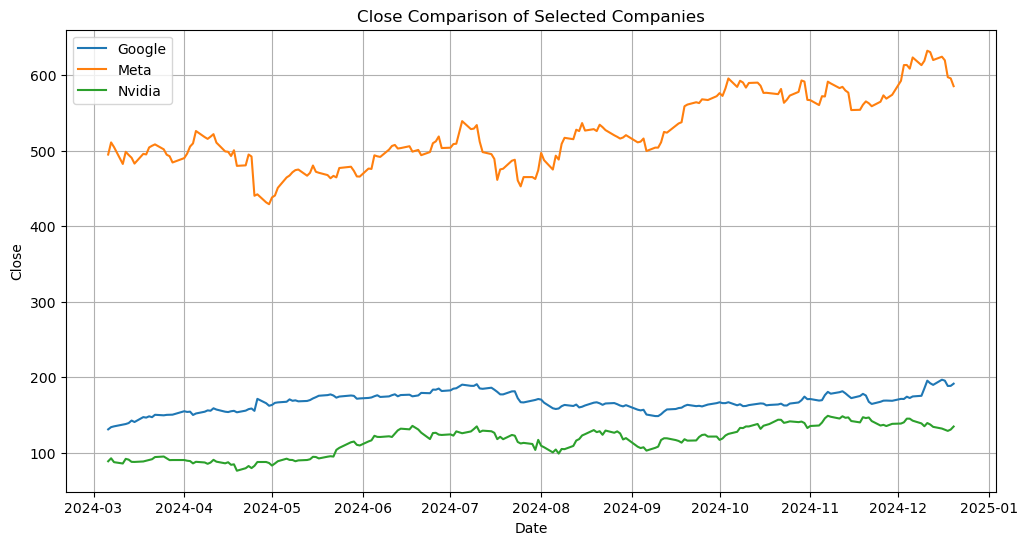


Do you wish to continue the analysis ? Enter Yes or No. No


In [18]:
print("Welcome to stock price analysis page.\n")
choice = ""
while(True):
  print("You have the choice of following companies for analysis :\n" , names)
  print("1. You would like to analyse a single company.\n2. You would like to compare stocks of 2 or more companies using line charts")
  option = int(input("Enter 1 or 2 :"))
  if option == 1:  
    choice = input("Enter the company name from the given list :")
    if choice not in names:
        print("Please enter a valid name")
        continue
    else:
        period = input("Enter for last how many years you want the stock data (1 or 2 or 5) :")
        if period in ['1','2','5']:
            analysis(choice , period + 'y') 
        else:    
            print("Invalid option.")
            continue

    opt = input("Do you wish to continue the analysis ? Enter Yes or No.")
    if opt == "Yes":
        continue
    else: break
        
  elif option == 2:
       compare()
       opt = input("\nDo you wish to continue the analysis ? Enter Yes or No.")
       if opt == "Yes":
        continue
       else: break